## 
# This script produces scaling law analysis for brazilian cities 

# author: Joao Meirelles
##

# Initialization 

In [1]:
## load libraires

library(plyr)  
library(ggplot2)
library(reshape2)


In [2]:
## functions

log10_ceiling <- function(x) {
  10^(ceiling(log10(x)))
}
options(scipen=10000)


In [6]:
base

Codigo,Sigla,Municipio,pop,area,pib,km_ruas,densidade,estabelecimentos_saude_total,leitosinternacao_saude_total,⋯,extencaoRede_esgotamentoSanitario_km,volumeColetado_esgotamentoSanitario_millm3porano,amostras_coliformesTotais_esgotamentoSanitario,pop_urb_atendida,catadoresAssociados_quantidade,residuosColetadoa_total_tonporano,caminhoes,despesaColeta_rsu_total_reaisporano,trabalhadores_rsu_total,sarjetasVarridas_total_kmporano
110001,RO,Alta Floresta D'Oeste,24392,7067.0,149763.91,0.6268888,3.45,11,51,⋯,NA,NA,58,20408,0,NA,3,995000.0,23,NA
110002,RO,Ariquemes,90353,4426.6,577129.81,5.0190751,20.41,34,234,⋯,NA,NA,3306,68000,0,NA,8,2260745.0,103,1440
110003,RO,Cabixi,6313,1314.4,44351.84,0.7413290,4.80,6,25,⋯,NA,NA,1812,NA,NA,NA,NA,NA,NA,NA
110004,RO,Cacoal,78574,3792.8,521357.79,3.4128235,20.72,30,178,⋯,158.0,1131.08,1205,NA,NA,NA,NA,NA,NA,NA
110005,RO,Cerejeiras,17029,2783.3,121554.67,1.5962540,6.12,11,150,⋯,NA,NA,2375,NA,NA,NA,NA,NA,NA,NA
110006,RO,Colorado do Oeste,18591,1451.1,100920.01,1.8998256,12.81,9,60,⋯,NA,NA,3257,NA,NA,NA,NA,NA,NA,NA
110007,RO,Corumbiara,8783,3060.3,87032.91,1.1346621,2.87,2,0,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,NA
110008,RO,Costa Marques,13678,4987.2,60422.68,1.3883125,2.74,11,36,⋯,NA,NA,3031,NA,NA,NA,NA,NA,NA,NA
110009,RO,Espig�o D'Oeste,28729,4518.0,163629.11,0.9848978,6.36,11,65,⋯,NA,NA,3221,NA,NA,NA,NA,NA,NA,NA
110010,RO,Guajar�-Mirim,41656,24855.8,290092.77,3.2915299,1.68,19,136,⋯,13.4,215.60,2569,NA,NA,NA,NA,NA,NA,NA


In [ ]:
## load data

In [3]:
base <- read.csv(file="./br_cities_jm.csv", head=TRUE, sep=",")
str(base)

'data.frame':	5564 obs. of  67 variables:
 $ Codigo                                                 : int  110001 110002 110003 110004 110005 110006 110007 110008 110009 110010 ...
 $ Sigla                                                  : Factor w/ 27 levels "AC","AL","AM",..: 21 21 21 21 21 21 21 21 21 21 ...
 $ Municipio                                              : Factor w/ 5276 levels "A�ail�ndia","Abadia de Goi�s",..: 100 331 747 777 1112 1207 1310 1315 1582 1866 ...
 $ pop                                                    : int  24392 90353 6313 78574 17029 18591 8783 13678 28729 41656 ...
 $ area                                                   : num  7067 4427 1314 3793 2783 ...
 $ pib                                                    : num  149764 577130 44352 521358 121555 ...
 $ km_ruas                                                : num  0.627 5.019 0.741 3.413 1.596 ...
 $ densidade                                              : num  3.45 20.41 4.8 20.72 6.12 ...
 

In [ ]:
#calculate density
  base$densidade <- (base$pop / base$area)

In [7]:
#######################
##### Translation #####
#######################

original<-c('Codigo',
'Sigla',
'Municipio',
'pop',
'area',
'pib',
'km_ruas',
'densidade',
'estabelecimentos_saude_total',
'leitosinternacao_saude_total',
'escolas_fundamental',
'escolas_medio',
'escolas_preescola',
'ongs',
'emp_atuantes',
'emp_unidades_locais',
'vítimas_acidentes_trânsito',
'homicidios',
'suicidios',
'Despesa_corrente',
'Despesa_de_custeio',
'Despesa_de_capital',
'Despesa_orcamentaria',
'Despesas_por_funcao',
'Despesa_transferências_correntes',
'Receita_orcamentaria',
'Receita_corrente',
'Receita_tributaria',
'Receita_de_capital',
'Receita_tributaria_impostos',
'Receita_tributaria_IPTU',
'Receita_tributaria_ISS',
'Receita_tributaria_taxas',
'pessoas_comregistro',
'alfabetizados',
'renda',
'domicilio_tinha_banheiro',
'domicilio_tinha_banheiro_redeesgoto',
'pessoa_abastecimento_redegeral',
'pessoa_lixo_coletado',
'pessoa_energia_eletrica',
'pessoa_com_banheiroexclusivo',
'pessoa_energia_eletrica_medidor',
'pessoa_lixo_jogado_terrenobaldio',
'pessoa_lixo_queimado',
'receitaOperacional_total_aguaesgoto_reaisporano',
'arrecadacao_total_aguaesgoto_reaisporano',
'despesa_comPessoal_total_aguaesgoto_reaisporano',
'pop_abastecimentoAgua',
'ligacoes_totais_abastecimentoAgua',
'extencaoRede_abastecimentoAgua_km',
'consumoEnergia_abastecimentoAgua_milKWhporano',
'investimentos_abastecimentoAgua_reaisporano',
'paralizacoes_economiasAtivasAtingidas_abastecimentoAgua',
'pop_esgotamentoSanitario',
'ligacoes_totais_esgotamentoSanitario',
'economiasAtivas_esgotamentoSanitario',
'extencaoRede_esgotamentoSanitario_km',
'volumeColetado_esgotamentoSanitario_millm3porano',
'amostras_coliformesTotais_esgotamentoSanitario',
'pop_urb_atendida',
'catadoresAssociados_quantidade',
'residuosColetadoa_total_tonporano',
'caminhoes',
'despesaColeta_rsu_total_reaisporano',
'trabalhadores_rsu_total',
'sarjetasVarridas_total_kmporano')


translationabbreviation<-c('idOfMunicipality',
'abbreviationOfState',
'nameOfMunicipality',
'numberOfInhabitants',
'surfaceOfAdministrativeArea_km2',
'GrossDomesticProduct_brReaisPerYear',
'LenghtOfStreetNetwork_km',
'populationDensity_inhabitantsPerkm2',
'numberOfHealthFacilities',
'numberOfHospitalBeds',
'numberOfPrimarySchools',
'numberOfSecondarySchools',
'numberOfDaycareFacilities',
'numberOfNonGovernmentalOrganizations',
'numberOfCommercialEnterprises',
'numberOfCommercialEnterprisesFacility',
'numberOfDeathsByTrafficAccident',
'numberOfHomicides',
'numberOfSuicides',
'currentExpenditure',
'subsidyExpenditure',
'capitalExpenditure',
'budgetedExpenditure',
'expenditureByFunction',
'currentExpenditureOfTransference',
'budgetedRevenue',
'currentRevenue',
'taxRevenue',
'capitalRevenue',
'taxRevenueTaxes',
'taxRevenueUrbanLandTax',
'taxRevenueServiceTax',
'taxRevenueTax',
'numberOfRegisteredInhabitants',
'numberOfLiterateInhabitants',
'AverageMonthlyIncomeOfActiveInhabitants_brReais',
'numberOfHousesWithBathroom',
'numberOfHousesConnectedToSewageSystem',
'numberOfInhabitantsWithMunicipalWaterSupply',
'numberOfInhabitantsServedByWasteCollection',
'numberOfInhabitantsWithAccessToElectricity',
'numberOfInhabitantsWithExclusiveBathroom',
'numberOfInhabitantsWithElectricityMeasurement',
'numberOfInhabitantsWithWasteIllegalDumping',
'numberOfInhabitantsWithWasteIllegalBurning',
'operationalExpenditureWaterAndWasteSystems_brReaisPerYear',
'revenueWaterAndWasteSystems_brReaisPerYear',
'staffExpenditureWaterAndWasteSystems_brReaisPerYear',
'numberOfInhabitantsWithMunicipalWaterSupply',
'numberOfConnectionsToWaterSupplyNetwork',
'lenghtOfWaterSupplyNetwork_km',
'finalEnergyUseByWaterSupplyAssets_kKwhPerYear', 
'investmentsOnWaterSupplyAssets_brReaisPerYear',
'numberOfInterruptionsInWaterSupply',
'numberOfInhabitantsConnectedToSewageNetwork',
'numberOfConnectionsToSewageNetwork',
'numberOfUserContractsOfSewageNetwork',
'lenghtOfSewageSupplyNetwork_km',
'volumeOfColectedSewage_km3PerYear',
'frequencyOfSamplingOfSewageEffluent',
'numberOfUrbanInhabitantsServedByWasteCollection',
'numberOfScavengersInWasteCollection',
'totalMassOfWasteCollected_tonsPerYear',
'numberOfWasteCollectionTrucks',
'wasteCollectionRevenue_brReaisPeryear',
'numberOfWorkersInWasteCollection',
'lengthOfSidewalkSwept_kmPerYear')

names <- data.frame(original, translation)
names

original,translation
Codigo,idOfMunicipality
Sigla,abbreviationOfState
Municipio,nameOfMunicipality
pop,numberOfInhabitants
area,surfaceOfAdministrativeArea_km2
pib,GrossDomesticProduct_brReaisPerYear
km_ruas,LenghtOfStreetNetwork_km
densidade,populationDensity_inhabitantsPerkm2
estabelecimentos_saude_total,numberOfHealthFacilities
leitosinternacao_saude_total,numberOfHospitalBeds


In [17]:
colnames(base) <- names$translation
colnames(base)

# First Analysis

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

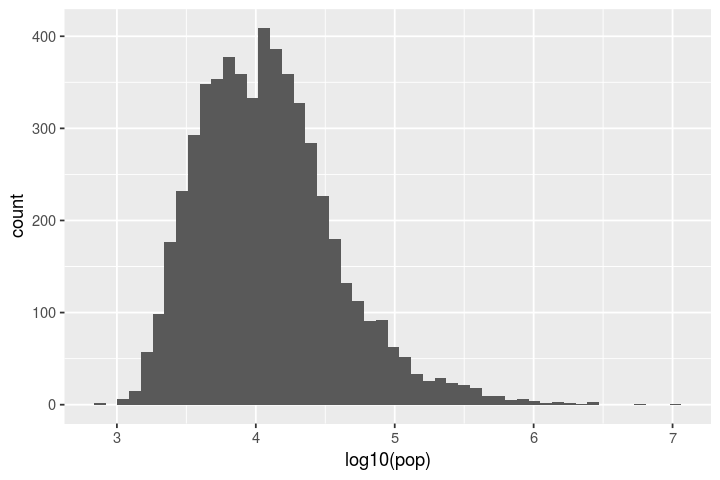

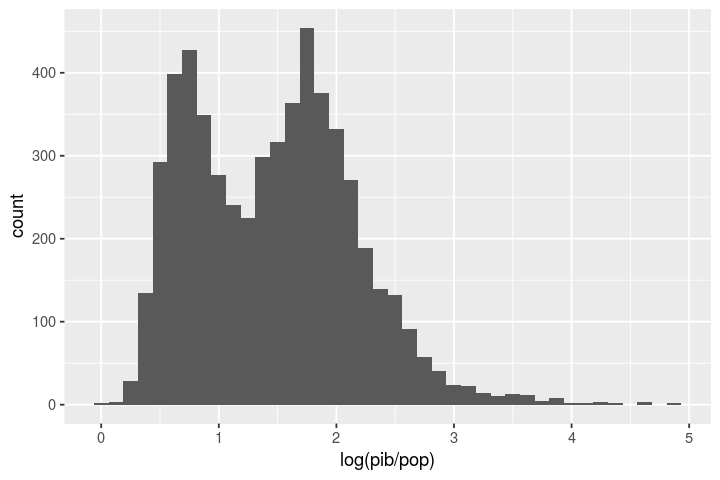

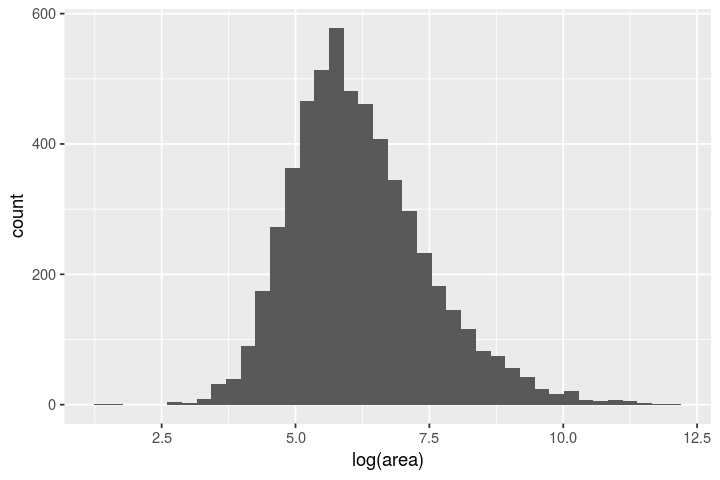

In [12]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(base, aes(log10(pop)))+geom_histogram(bins=50)
ggplot(base, aes(log(pib/pop)))+geom_histogram(bins=40)
ggplot(base, aes(log(area)))+geom_histogram(bins=40)

# Plots

In [ ]:
ggplot(base, aes(log10()))

# Robustness

In [19]:
#create data.frame without city names and state for the scaling analysis
basepar_sp <- base[-c(1:3)]

In [20]:
#create data.frames and vectors to be used in the robustness analysis 
  dens_cuts <- c(0:2000)
  l <- length(dens_cuts)

  scaling_rob <- data.frame(matrix(ncol = 11, nrow = 0))
  colnames(scaling_rob) <- c("dens_min", "cases","variable", "intercept", "alpha", "rsquared", "pvalue", "std_error", "ci_lw", "ci_hi")

  scale_regression <- list()


In [21]:
options(warn=-1)

In [23]:
#Run the robustness analysis
for (v in 1:ncol(basepar_sp)){
  print(v/ncol(basepar_sp))
  colnames(basepar_sp)[v]
  
  scale_v <- data.frame(matrix(ncol = 10, nrow = 0))
  colnames(scale_v) <- c("dens_min", "cases","variable", "intercept", "alpha", "rsquared", "pvalue", "std_error", "ci_lw", "ci_hi")
  
  for (i in dens_cuts)  {
   # print(i)
    

    # density_cut
    basepars_v <- subset(basepar_sp, populationDensity_inhabitantsPerkm2>i)
    #print(nrow(basepars_v))
    
    ### +1 to make log(0) = 0 ###
    scale_regression <- lm(log10(basepars_v[,v]+1) ~ log10(basepars_v[,1]+1))
    
    
    scale_v[[i+1, 1]]<- i
    scale_v[[i+1, 2]] <- nrow(basepars_v)
    scale_v[[i+1, 3]]<- colnames(basepars_v)[v]
    
    
    scale_v[[i+1, 4]] <- summary(scale_regression)$coefficients[1,1] #intercept
    scale_v[[i+1, 5]] <- summary(scale_regression)$coefficients[2,1] #alpha
    scale_v[[i+1, 6]] <- summary(scale_regression)$r.squared #rsquared
    scale_v[[i+1, 7]] <- summary(scale_regression)$coefficients[2,4] #pvalue 
    scale_v[[i+1, 8]] <- summary(scale_regression)$coefficients[2,2] #std_erros
    scale_v[[i+1, 9]] <- confint(scale_regression, level=0.9)[2,1] #90ci_lw
    scale_v[[i+1, 10]] <- confint(scale_regression, level=0.9)[2,2] #90ci_hi
      
    
    
  }
  scaling_rob <- rbind(scaling_rob,scale_v)
  
}   


[1] 0.015625
[1] 0.03125
[1] 0.046875
[1] 0.0625
[1] 0.078125
[1] 0.09375
[1] 0.109375
[1] 0.125
[1] 0.140625
[1] 0.15625
[1] 0.171875
[1] 0.1875
[1] 0.203125
[1] 0.21875
[1] 0.234375
[1] 0.25
[1] 0.265625
[1] 0.28125
[1] 0.296875
[1] 0.3125
[1] 0.328125
[1] 0.34375
[1] 0.359375
[1] 0.375
[1] 0.390625
[1] 0.40625
[1] 0.421875
[1] 0.4375
[1] 0.453125
[1] 0.46875
[1] 0.484375
[1] 0.5
[1] 0.515625
[1] 0.53125
[1] 0.546875
[1] 0.5625
[1] 0.578125
[1] 0.59375
[1] 0.609375
[1] 0.625
[1] 0.640625
[1] 0.65625
[1] 0.671875
[1] 0.6875
[1] 0.703125
[1] 0.71875
[1] 0.734375
[1] 0.75
[1] 0.765625
[1] 0.78125
[1] 0.796875
[1] 0.8125
[1] 0.828125
[1] 0.84375
[1] 0.859375
[1] 0.875
[1] 0.890625
[1] 0.90625
[1] 0.921875
[1] 0.9375
[1] 0.953125
[1] 0.96875
[1] 0.984375
[1] 1


In [68]:
options(warn=0)

In [ ]:
#analysis

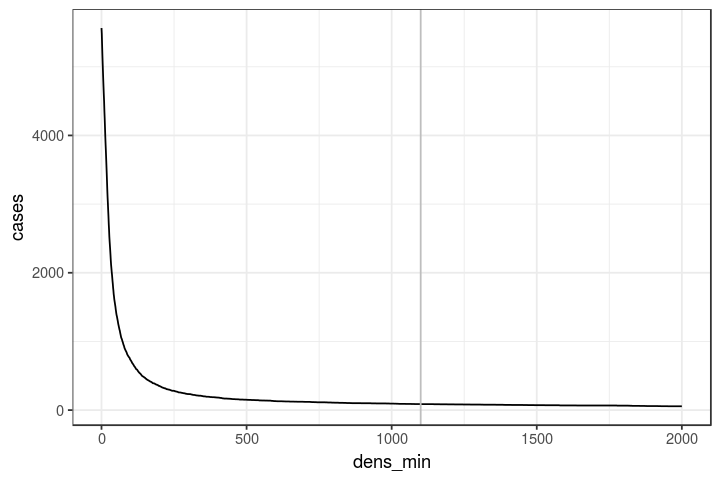

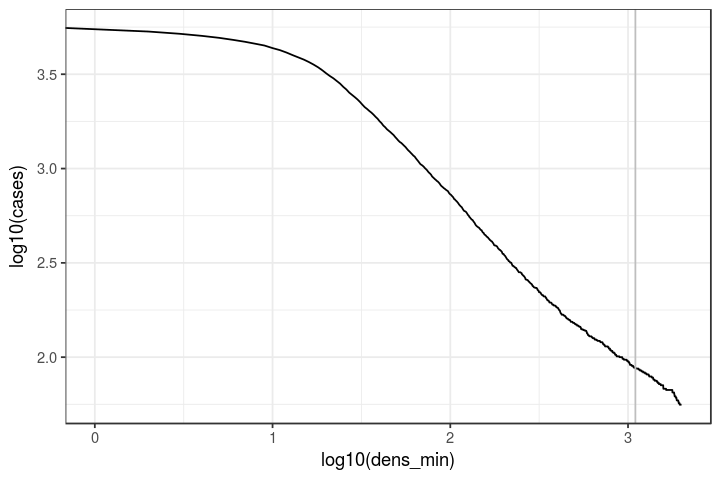

In [25]:
# number of cases
ggplot(scaling_rob, aes(dens_min, cases))+geom_line()+theme_bw()+geom_vline(xintercept=1100, color="grey")

ggplot(scaling_rob, aes(log10(dens_min), log10(cases)))+geom_line()+theme_bw()+geom_vline(xintercept=log10(1100), color="grey")


#ggplot(scaling_rob, aes(log(dens_min), log(cases)))+geom_point(shape=1)+geom_line()+theme_bw()


In [26]:
head(scaling_rob)

dens_min,cases,variable,intercept,alpha,rsquared,pvalue,std_error,ci_lw,ci_hi
0,5564,numberOfInhabitants,-0.000000000000019051389,1,1,0,0.00000000000000006351034,1,1
1,5479,numberOfInhabitants,0.000000000000002303832,1,1,0,0.00000000000000001105553,1,1
2,5327,numberOfInhabitants,0.000000000000003115293,1,1,0,0.00000000000000001117505,1,1
3,5183,numberOfInhabitants,-0.000000000000016580930,1,1,0,0.00000000000000005126404,1,1
4,5053,numberOfInhabitants,0.000000000000010395584,1,1,0,0.00000000000000003311487,1,1
5,4933,numberOfInhabitants,-0.000000000000016186563,1,1,0,0.00000000000000005607859,1,1


In [34]:
scaling_rob_class

dens_min,cases,variable,intercept,alpha,rsquared,pvalue,std_error,ci_lw,ci_hi,classification
0,5564,numberOfInhabitants,-0.0000000000000190513887,1,1,0,0.0000000000000000635103369,1,1,NA
1,5479,numberOfInhabitants,0.0000000000000023038319,1,1,0,0.0000000000000000110555327,1,1,NA
2,5327,numberOfInhabitants,0.0000000000000031152925,1,1,0,0.0000000000000000111750481,1,1,NA
3,5183,numberOfInhabitants,-0.0000000000000165809298,1,1,0,0.0000000000000000512640380,1,1,NA
4,5053,numberOfInhabitants,0.0000000000000103955840,1,1,0,0.0000000000000000331148742,1,1,NA
5,4933,numberOfInhabitants,-0.0000000000000161865625,1,1,0,0.0000000000000000560785863,1,1,NA
6,4811,numberOfInhabitants,0.0000000000000163905115,1,1,0,0.0000000000000000571539140,1,1,NA
7,4700,numberOfInhabitants,-0.0000000000000008291465,1,1,0,0.0000000000000000028520363,1,1,NA
8,4589,numberOfInhabitants,-0.0000000000000192996307,1,1,0,0.0000000000000000699973763,1,1,NA
9,4491,numberOfInhabitants,-0.0000000000000042411015,1,1,0,0.0000000000000000150944134,1,1,NA


In [33]:
scaling_rob_class <- scaling_rob
scaling_rob_class$classification <- NA

In [38]:
####PT not use
print('GrossDomesticProduct_brReaisPerYear')
scaling_rob_class[scaling_rob_class$variable=="GrossDomesticProduct_brReaisPerYear",]$classification <- "socioeconomic"
print('surfaceOfAdministrativeArea_km2')
scaling_rob_class[scaling_rob_class$variable=="surfaceOfAdministrativeArea_km2",]$classification <- "infrastructure"
print('LenghtOfStreetNetwork_km')
scaling_rob_class[scaling_rob_class$variable=="LenghtOfStreetNetwork_km",]$classification <- "infrastructure"
print('numberOfHealthFacilities')
scaling_rob_class[scaling_rob_class$variable=="numberOfHealthFacilities",]$classification <- "infrastructure_topdown"
#scaling_rob_class[scaling_rob_class$variable=="numberOfHospitalBeds",]$classification <- "infrastructure"
print('numberOfPrimarySchools')
scaling_rob_class[scaling_rob_class$variable=="numberOfPrimarySchools",]$classification <- "infrastructure"
#scaling_rob_class[scaling_rob_class$variable=="numberOfSecondarySchools",]$classification <- "infrastructure"
#scaling_rob_class[scaling_rob_class$variable=="numberOfDaycareFacilities",]$classification <- "infrastructure"
print('numberOfNonGovernmentalOrganizations')
scaling_rob_class[scaling_rob_class$variable=="numberOfNonGovernmentalOrganizations",]$classification <- "socioeconomic"
print('numberOfCommercialEnterprises')
scaling_rob_class[scaling_rob_class$variable=="numberOfCommercialEnterprises",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="numberOfCommercialEnterprisesFacility",]$classification <- "socioeconomic"

print('numberOfDeathsByTrafficAccident')
scaling_rob_class[scaling_rob_class$variable=="numberOfDeathsByTrafficAccident",]$classification <- "socioeconomic"
print('numberOfHomicides')
scaling_rob_class[scaling_rob_class$variable=="numberOfHomicides",]$classification <- "socioeconomic"
print('numberOfSuicides')
scaling_rob_class[scaling_rob_class$variable=="numberOfSuicides",]$classification <- "infrastructure"


#scaling_rob_class[scaling_rob_class$variable=="currentExpenditure",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="subsidyExpenditure",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="capitalExpenditure",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="budgetedExpenditure",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="expenditureByFunction",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="currentExpenditureOfTransference",]$classification <- "socioeconomic"

#scaling_rob_class[scaling_rob_class$variable=="budgetedRevenue",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="currentRevenue",]$classification <- "socioeconomic"
print('taxRevenue')
scaling_rob_class[scaling_rob_class$variable=="taxRevenue",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="capitalRevenue",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="taxRevenueTaxes",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="taxRevenueUrbanLandTax",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="taxRevenueServiceTax",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="taxRevenueTax",]$classification <- "socioeconomic"


#scaling_rob_class[scaling_rob_class$variable=="numberOfRegisteredInhabitants",]$classification <- "socioeconomic"
print('numberOfLiterateInhabitants')
scaling_rob_class[scaling_rob_class$variable=="numberOfLiterateInhabitants",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="AverageMonthlyIncomeOfActiveInhabitants_brReais",]$classification <- "socioeconomic"

print('numberOfHousesWithBathroom')
scaling_rob_class[scaling_rob_class$variable=="numberOfHousesWithBathroom",]$classification <- "base"
print('numberOfHousesConnectedToSewageSystem')
scaling_rob_class[scaling_rob_class$variable=="numberOfHousesConnectedToSewageSystem",]$classification <- "infrastructure_topdown"


print('numberOfInhabitantsWithMunicipalWaterSupply')
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithMunicipalWaterSupply",]$classification <- "base"
print('numberOfConnectionsToWaterSupplyNetwork')
scaling_rob_class[scaling_rob_class$variable=="numberOfConnectionsToWaterSupplyNetwork",]$classification <- "infrastructure"
print('lenghtOfWaterSupplyNetwork_km')
scaling_rob_class[scaling_rob_class$variable=="lenghtOfWaterSupplyNetwork_km",]$classification <- "infrastructure"
#scaling_rob_class[scaling_rob_class$variable=="totalMassOfWasteCollected_tonsPerYear",]$classification <- "socioeconomic"
print('numberOfWasteCollectionTrucks')
scaling_rob_class[scaling_rob_class$variable=="numberOfWasteCollectionTrucks",]$classification <- "infrastructure"
#scaling_rob_class[scaling_rob_class$variable=="wasteCollectionRevenue_brReaisPeryear",]$classification <- "infrastructure"
print('numberOfWorkersInWasteCollection')
scaling_rob_class[scaling_rob_class$variable=="numberOfWorkersInWasteCollection",]$classification <- "infrastructure"
print('lengthOfSidewalkSwept_kmPerYear')
scaling_rob_class[scaling_rob_class$variable=="lengthOfSidewalkSwept_kmPerYear",]$classification <- "socioeconomic"


print('staffExpenditureWaterAndWasteSystems_brReaisPerYear')
scaling_rob_class[scaling_rob_class$variable=="staffExpenditureWaterAndWasteSystems_brReaisPerYear",]$classification <- "infrastructure_topdown"

print('finalEnergyUseByWaterSupplyAssets_kKwhPerYear')
scaling_rob_class[scaling_rob_class$variable=="finalEnergyUseByWaterSupplyAssets_kKwhPerYear",]$classification <- "infrastructure_topdown"
print('numberOfInhabitantsConnectedToSewageNetwork')
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsConnectedToSewageNetwork",]$classification <- "infrastructure_topdown"
print('numberOfConnectionsToSewageNetwork')
scaling_rob_class[scaling_rob_class$variable=="numberOfConnectionsToSewageNetwork",]$classification <- "infrastructure_topdown"
print('numberOfUserContractsOfSewageNetwork')
scaling_rob_class[scaling_rob_class$variable=="numberOfUserContractsOfSewageNetwork",]$classification <- "infrastructure_topdown"
print('lenghtOfSewageSupplyNetwork_km')
scaling_rob_class[scaling_rob_class$variable=="lenghtOfSewageSupplyNetwork_km",]$classification <- "infrastructure_topdown"
print('volumeOfColectedSewage_km3PerYear')
scaling_rob_class[scaling_rob_class$variable=="volumeOfColectedSewage_km3PerYear",]$classification <- "infrastructure_topdown"


#"pessoa"
#"pessoa_branca"
#"pessoa_preta"
#"pessoa_amarela"
#"pessoa_parda"
#"pessoa_indigena"
#"entorno"
#"domicilio_tinha_banheiro"

#"pessoa_abastecimento_redegeral"
#"pessoa_lixo_coletado"
#"pessoa_energia_eletrica"
#"pessoa_com_banheiroexclusivo"
#"pessoa_energia_eletrica_medidor"
#"pessoa_lixo_jogado_terrenobaldio"
#"pessoa_lixo_queimado"
#"receitaOperacional_total_aguaesgoto_reaisporano"
#"arrecadacao_total_aguaesgoto_reaisporano"


#"investimentos_abastecimentoAgua_reaisporano"
#"paralizacoes_economiasAtivasAtingidas_abastecimentoAgua"

#"amostras_coliformesTotais_esgotamentoSanitario"
#"pop_urb_atendida"
#"catadoresAssociados_quantidade"


[1] "GrossDomesticProduct_brReaisPerYear"
[1] "surfaceOfAdministrativeArea_km2"
[1] "LenghtOfStreetNetwork_km"
[1] "numberOfHealthFacilities"
[1] "numberOfPrimarySchools"
[1] "numberOfNonGovernmentalOrganizations"
[1] "numberOfCommercialEnterprises"
[1] "numberOfDeathsByTrafficAccident"
[1] "numberOfHomicides"
[1] "numberOfSuicides"
[1] "taxRevenue"
[1] "numberOfLiterateInhabitants"
[1] "numberOfHousesWithBathroom"
[1] "numberOfHousesConnectedToSewageSystem"
[1] "numberOfInhabitantsWithMunicipalWaterSupply"
[1] "numberOfConnectionsToWaterSupplyNetwork"
[1] "lenghtOfWaterSupplyNetwork_km"
[1] "numberOfWasteCollectionTrucks"
[1] "numberOfWorkersInWasteCollection"
[1] "lengthOfSidewalkSwept_kmPerYear"
[1] "staffExpenditureWaterAndWasteSystems_brReaisPerYear"
[1] "finalEnergyUseByWaterSupplyAssets_kKwhPerYear"
[1] "numberOfInhabitantsConnectedToSewageNetwork"
[1] "numberOfConnectionsToSewageNetwork"
[1] "numberOfUserContractsOfSewageNetwork"
[1] "lenghtOfSewageSupplyNetwork_km"
[1] "volume

In [35]:
####PT not use
scaling_rob_class[scaling_rob_class$variable=="pib",]$classification <- "socioeconomic"
scaling_rob_class[scaling_rob_class$variable=="area",]$classification <- "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="km_ruas",]$classification <- "infrastructure"

scaling_rob_class[scaling_rob_class$variable=="estabelecimentos_saude_total",]$classification <- "infrastructure_topdown"
#scaling_rob_class[scaling_rob_class$variable=="leitosinternacao_saude_total",]$classification <- "infrastructure"

scaling_rob_class[scaling_rob_class$variable=="escolas_fundamental",]$classification <- "infrastructure"
#scaling_rob_class[scaling_rob_class$variable=="escolas_medio",]$classification <- "infrastructure"
#scaling_rob_class[scaling_rob_class$variable=="escolas_preescola",]$classification <- "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="ongs",]$classification <- "socioeconomic"
scaling_rob_class[scaling_rob_class$variable=="emp_atuantes",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="emp_unidades_locais",]$classification <- "socioeconomic"


scaling_rob_class[scaling_rob_class$variable=="vítimas_acidentes_trânsito",]$classification <- "socioeconomic"
scaling_rob_class[scaling_rob_class$variable=="homicidios",]$classification <- "socioeconomic"
scaling_rob_class[scaling_rob_class$variable=="suicidios",]$classification <- "infrastructure"


#scaling_rob_class[scaling_rob_class$variable=="Despesa_corrente",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Despesa_de_custeio",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Despesa_de_capital",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Despesa_orcamentaria",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Despesas_por_funcao",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Despesa_transferências_correntes",]$classification <- "socioeconomic"

#scaling_rob_class[scaling_rob_class$variable=="Receita_orcamentaria",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Receita_corrente",]$classification <- "socioeconomic"
scaling_rob_class[scaling_rob_class$variable=="Receita_tributaria",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Receita_de_capital",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Receita_tributaria_impostos",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Receita_tributaria_IPTU",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Receita_tributaria_ISS",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="Receita_tributaria_taxas",]$classification <- "socioeconomic"


#scaling_rob_class[scaling_rob_class$variable=="pessoas_comregistro",]$classification <- "socioeconomic"
scaling_rob_class[scaling_rob_class$variable=="alfabetizados",]$classification <- "socioeconomic"
#scaling_rob_class[scaling_rob_class$variable=="renda",]$classification <- "socioeconomic"

scaling_rob_class[scaling_rob_class$variable=="domicilio_tinha_banheiro",]$classification <- "base"
scaling_rob_class[scaling_rob_class$variable=="domicilio_tinha_banheiro_redeesgoto",]$classification <- "infrastructure_topdown"


scaling_rob_class[scaling_rob_class$variable=="pop_abastecimentoAgua",]$classification <- "base"
scaling_rob_class[scaling_rob_class$variable=="ligacoes_totais_abastecimentoAgua",]$classification <- "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="extencaoRede_abastecimentoAgua_km",]$classification <- "infrastructure"
#scaling_rob_class[scaling_rob_class$variable=="residuosColetadoa_total_tonporano",]$classification <- "socioeconomic"
scaling_rob_class[scaling_rob_class$variable=="caminhoes",]$classification <- "infrastructure"
#scaling_rob_class[scaling_rob_class$variable=="despesaColeta_rsu_total_reaisporano",]$classification <- "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="trabalhadores_rsu_total",]$classification <- "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="sarjetasVarridas_total_kmporano",]$classification <- "socioeconomic"


scaling_rob_class[scaling_rob_class$variable=="despesa_comPessoal_total_aguaesgoto_reaisporano",]$classification <- "infrastructure_topdown"
scaling_rob_class[scaling_rob_class$variable=="consumoEnergia_abastecimentoAgua_milKWhporano",]$classification <- "infrastructure_topdown"
scaling_rob_class[scaling_rob_class$variable=="pop_esgotamentoSanitario",]$classification <- "infrastructure_topdown"
scaling_rob_class[scaling_rob_class$variable=="ligacoes_totais_esgotamentoSanitario",]$classification <- "infrastructure_topdown"
scaling_rob_class[scaling_rob_class$variable=="economiasAtivas_esgotamentoSanitario",]$classification <- "infrastructure_topdown"
scaling_rob_class[scaling_rob_class$variable=="extencaoRede_esgotamentoSanitario_km",]$classification <- "infrastructure_topdown"
scaling_rob_class[scaling_rob_class$variable=="volumeColetado_esgotamentoSanitario_millm3porano",]$classification <- "infrastructure_topdown"


#"pessoa"
#"pessoa_branca"
#"pessoa_preta"
#"pessoa_amarela"
#"pessoa_parda"
#"pessoa_indigena"
#"entorno"
#"domicilio_tinha_banheiro"

#"pessoa_abastecimento_redegeral"
#"pessoa_lixo_coletado"
#"pessoa_energia_eletrica"
#"pessoa_com_banheiroexclusivo"
#"pessoa_energia_eletrica_medidor"
#"pessoa_lixo_jogado_terrenobaldio"
#"pessoa_lixo_queimado"
#"receitaOperacional_total_aguaesgoto_reaisporano"
#"arrecadacao_total_aguaesgoto_reaisporano"


#"investimentos_abastecimentoAgua_reaisporano"
#"paralizacoes_economiasAtivasAtingidas_abastecimentoAgua"

#"amostras_coliformesTotais_esgotamentoSanitario"
#"pop_urb_atendida"
#"catadoresAssociados_quantidade"


ERROR: Error in `$<-.data.frame`(`*tmp*`, classification, value = "socioeconomic"): replacement has 1 row, data has 0


In [39]:
options(repr.plot.width=8, repr.plot.height=4)

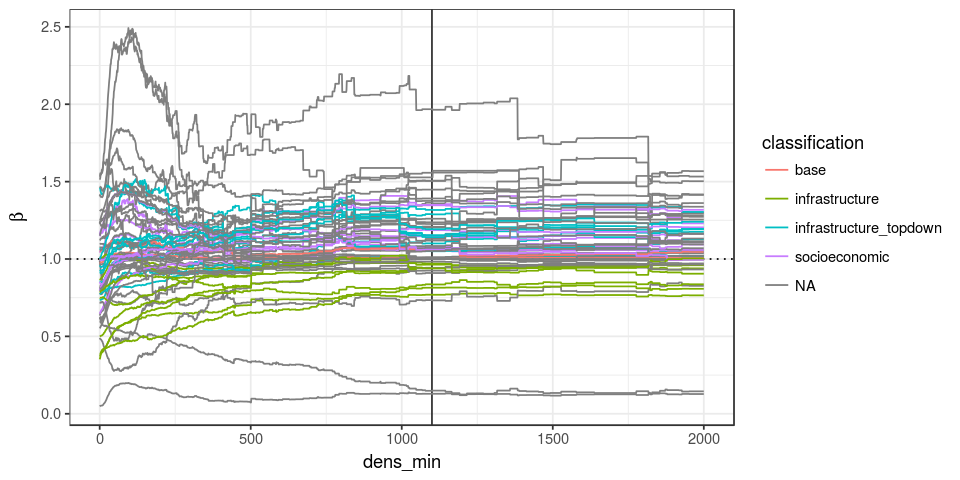

In [44]:
#plot todas as variaveis
ggplot(scaling_rob_class, aes(dens_min, alpha, group=variable, colour=classification))+
geom_hline(yintercept=1, color="black", linetype="dotted") +ylab(expression(beta))+
geom_vline(xintercept=1100, color="grey20")+
geom_line()+theme_bw()#+ theme(legend.position="none")

In [81]:
options(repr.plot.width=8, repr.plot.height=4)

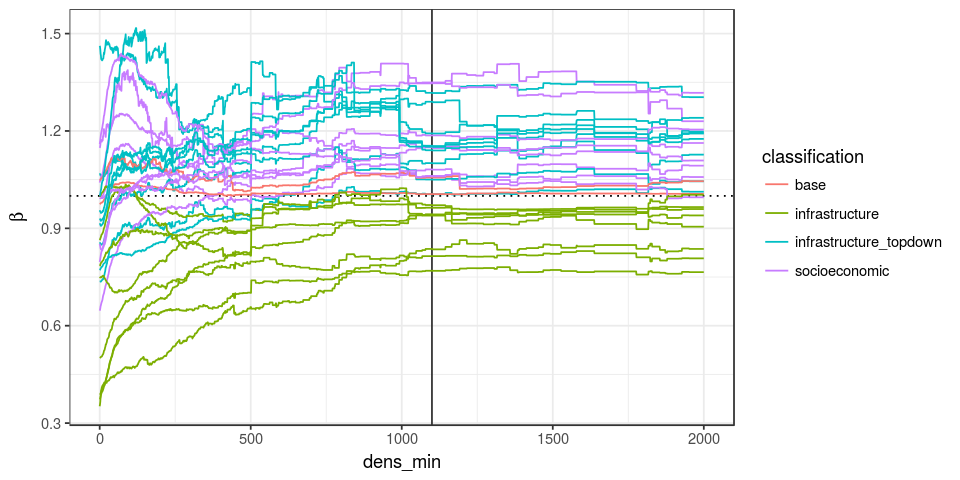

In [50]:
#plot todas as variaveis
ggplot(na.omit(scaling_rob_class), aes(dens_min, alpha, group=variable, colour=classification))+
geom_hline(yintercept=1, color="black", linetype="dotted") +ylab(expression(beta))+
geom_vline(xintercept=1100, color="grey20")+
geom_line()+theme_bw()#+ theme(legend.position="none")

ggsave('./plots/variables_rob_class.jpg', width=8, height= 4) 


In [116]:
options(repr.plot.width=8, repr.plot.height=4)

`geom_smooth()` using method = 'gam'


`geom_smooth()` using method = 'gam'


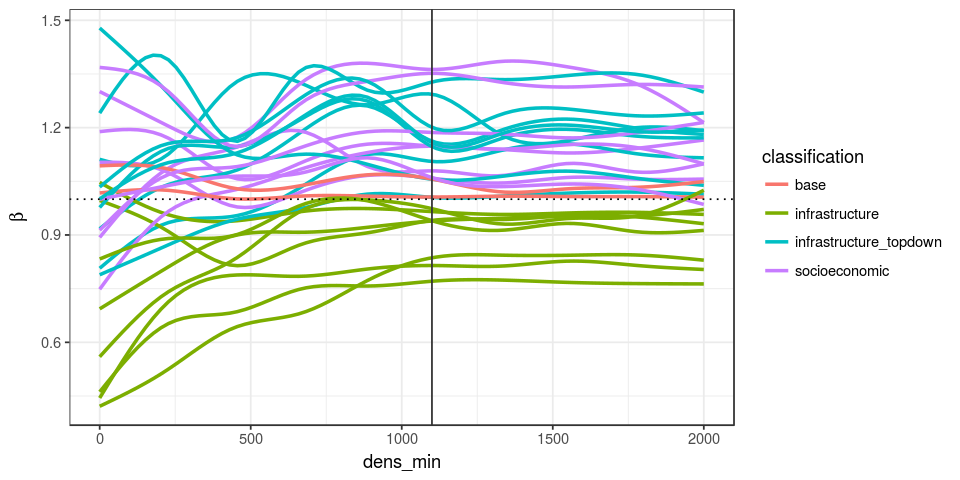

In [51]:
ggplot(na.omit(scaling_rob_class), aes(dens_min, alpha, group=variable, colour=classification))+geom_smooth(se=FALSE, span=5, size=1)+
geom_hline(yintercept=1, color="black", linetype="dotted") +ylab(expression(beta))+
geom_vline(xintercept=1100, color="grey20")+
theme_bw()#+ theme(legend.position="none")

ggsave('./plots/variables_rob_class_smooth.jpg', width=8, height= 4) 

## Post-Cut

# set up post-cut data.frame

In [53]:
str(scaling_poscorte)

'data.frame':	64 obs. of  11 variables:
 $ dens_min      : int  1100 1100 1100 1100 1100 1100 1100 1100 1100 1100 ...
 $ cases         : int  88 88 88 88 88 88 88 88 88 88 ...
 $ variable      : chr  "numberOfInhabitants" "surfaceOfAdministrativeArea_km2" "GrossDomesticProduct_brReaisPerYear" "LenghtOfStreetNetwork_km" ...
 $ intercept     : num  -0.00000000000000227 -2.54683108719440465 0.08274284440331538 -3.31975410589435738 2.63676888616131899 ...
 $ alpha         : num  1 0.837 1.149 0.769 0.148 ...
 $ rsquared      : num  1 0.6959 0.7936 0.8799 0.0654 ...
 $ pvalue        : num  0 0.0000000000000000000000060114878242495928808 0.0000000000000000000000000000003267794158427 0.00000000000000000| __truncated__ ...
 $ std_error     : num  0.0000000000000000462 0.0596298253576501153 0.0632061117088360547 0.0306467884431984167 0.0605296012029323052 ...
 $ ci_lw         : num  1 0.7374 1.0443 0.7183 0.0478 ...
 $ ci_hi         : num  1 0.936 1.254 0.82 0.249 ...
 $ classification: chr  NA

In [52]:
scaling_poscorte <- subset(scaling_rob_class, dens_min==1100)

In [54]:
colnames(scaling_poscorte)[11] <- c("classification")
scaling_poscorte <- scaling_poscorte[with(scaling_poscorte, order(alpha)), ]
scaling_poscorte$variable <- factor(scaling_poscorte$variable, levels = scaling_poscorte$variable[order(scaling_poscorte$alpha)])


In [55]:
scaling_poscorte <- scaling_poscorte[scaling_poscorte$rsquared>0.5,]

In [56]:
str(scaling_poscorte)

'data.frame':	51 obs. of  11 variables:
 $ dens_min      : int  1100 1100 1100 1100 1100 1100 1100 1100 1100 1100 ...
 $ cases         : int  88 88 88 88 88 88 88 88 88 88 ...
 $ variable      : Factor w/ 64 levels "AverageMonthlyIncomeOfActiveInhabitants_brReais",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ intercept     : num  -3.32 -3.446 -2.547 -1.784 -0.444 ...
 $ alpha         : num  0.769 0.814 0.837 0.91 0.925 ...
 $ rsquared      : num  0.88 0.606 0.696 0.64 0.793 ...
 $ pvalue        : num  0.0000000000000000000000000000000000000000241 0.0000000000000000199170005494077668986621049 0.0000000000000000000| __truncated__ ...
 $ std_error     : num  0.0306 0.0744 0.0596 0.074 0.051 ...
 $ ci_lw         : num  0.718 0.691 0.737 0.787 0.84 ...
 $ ci_hi         : num  0.82 0.938 0.936 1.033 1.01 ...
 $ classification: chr  "infrastructure" "infrastructure" "infrastructure" NA ...


In [57]:

scaling_poscorte

,dens_min,cases,variable,intercept,alpha,rsquared,pvalue,std_error,ci_lw,ci_hi,classification
7104,1100,88,LenghtOfStreetNetwork_km,-3.319754105894357376627,0.7692313,0.8798891,0.000000000000000000000000000000000000000024131715199973650567861388802315838372561138555007062533221548806820093,0.0306467884431984166627,0.7182729,0.8201897,infrastructure
31116,1100,88,numberOfSuicides,-3.445886379228978224631,0.8143898,0.6056521,0.000000000000000019917000549407766898662104874643162103205183642291691004100329109860467724502086639404296875000,0.0744068937868674756819,0.6905302,0.9382493,infrastructure
3102,1100,88,surfaceOfAdministrativeArea_km2,-2.546831087194404652507,0.8365471,0.6959121,0.000000000000000000000006011487824249592880774771012850635395968792672612882402564547703466280026418644411023706,0.0596298253576501152695,0.7373967,0.9356975,infrastructure
113157,1100,88,frequencyOfSamplingOfSewageEffluent,-1.783665751796543741392,0.9096014,0.6400284,0.000000000000000000014841905648162097784147935213764910140189261317145879345152925665729526372160762548446655273,0.0739905314574711425735,0.7865567,1.0326460,NA
61131,1100,88,numberOfRegisteredInhabitants,-0.443543024269123009606,0.9252788,0.7928493,0.000000000000000000000000000000382711363903370000025981836667942165533886506546037841536577181720548444359858182,0.0510001340912021455809,0.8404776,1.0100801,NA
125163,1100,88,numberOfWorkersInWasteCollection,-2.505378847926597263296,0.9393471,0.7742781,0.000000000000000000000231827294014532154926255497536370832899400966296266148069550594446042168783606030046939850,0.0633978387077066413147,0.8335353,1.0451589,infrastructure
15108,1100,88,numberOfPrimarySchools,-3.116048067817406064250,0.9416694,0.9500184,0.000000000000000000000000000000000000000000000000000000000984308595698866533947989028144553747471363181349473266,0.0232910029621706399228,0.9029419,0.9803969,infrastructure
17109,1100,88,numberOfSecondarySchools,-3.598154815848280563273,0.9426287,0.9485188,0.000000000000000000000000000000000000000000000000000000003511666781891575538344042077494702439113157025351679920,0.0236805939074311265491,0.9032534,0.9820040,NA
95148,1100,88,lenghtOfWaterSupplyNetwork_km,-2.357358355419009843246,0.9433422,0.8746838,0.000000000000000000000000000000000000000426210356373935320620162398720631954104288135205909841069303748033799161,0.0387291445135597017790,0.8789365,1.0077480,infrastructure
93147,1100,88,numberOfConnectionsToWaterSupplyNetwork,-0.418129990175072074887,0.9636458,0.9465692,0.000000000000000000000000000000000000000000000000000000075639967167483609020862960535631076490481112359288835096,0.0248329164262987671374,0.9223492,1.0049424,infrastructure


In [58]:
options(repr.plot.width=12, repr.plot.height=6)

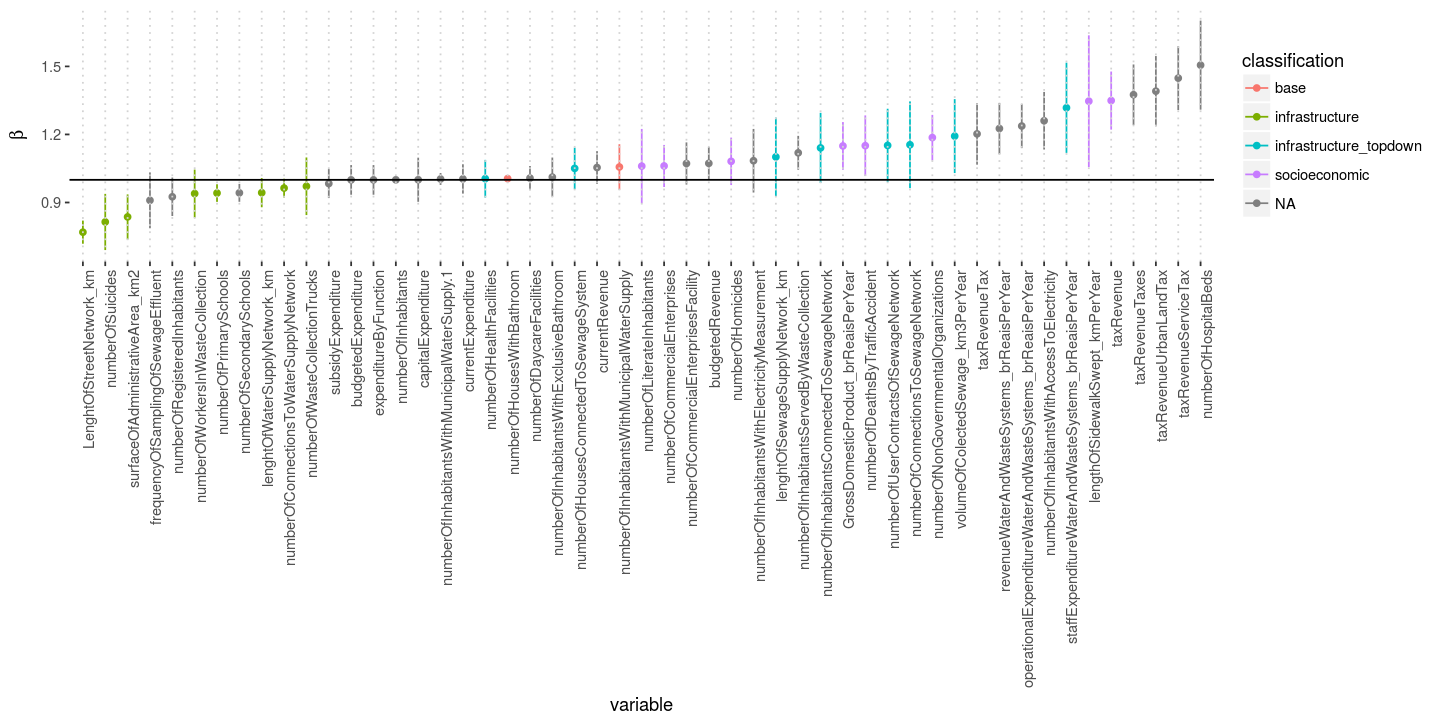

In [61]:
ggplot(scaling_poscorte)+
  geom_point(aes(variable, alpha, colour=classification))+
  geom_segment(aes(x = variable, y = ci_lw, xend = variable, yend = ci_hi, colour=classification))+
  geom_hline(yintercept=1)+ ylab(expression(beta))+
  geom_vline(data = scaling_poscorte, aes(xintercept = 1:nrow(scaling_poscorte)), linetype="dotted", color = "lightgrey", size=0.5)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), panel.background = element_rect(fill = 'white', colour = 'white' ))

In [65]:


scaling_poscorte_classification <- na.omit(scaling_poscorte)
str(scaling_poscorte_classification)

'data.frame':	26 obs. of  11 variables:
 $ dens_min      : int  1100 1100 1100 1100 1100 1100 1100 1100 1100 1100 ...
 $ cases         : int  88 88 88 88 88 88 88 88 88 88 ...
 $ variable      : Factor w/ 64 levels "AverageMonthlyIncomeOfActiveInhabitants_brReais",..: 4 5 6 9 10 12 13 14 22 23 ...
 $ intercept     : num  -3.32 -3.45 -2.55 -2.51 -3.12 ...
 $ alpha         : num  0.769 0.814 0.837 0.939 0.942 ...
 $ rsquared      : num  0.88 0.606 0.696 0.774 0.95 ...
 $ pvalue        : num  0.000000000000000000000000000000000000000024131715199973650568 0.000000000000000019917000549407766898662104874643| __truncated__ ...
 $ std_error     : num  0.0306 0.0744 0.0596 0.0634 0.0233 ...
 $ ci_lw         : num  0.718 0.691 0.737 0.834 0.903 ...
 $ ci_hi         : num  0.82 0.938 0.936 1.045 0.98 ...
 $ classification: chr  "infrastructure" "infrastructure" "infrastructure" "infrastructure" ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:25] 4 5 8 12 13 14 15 16 17 18 ...
  .. ..- attr

In [63]:
options(repr.plot.width=8, repr.plot.height=6)

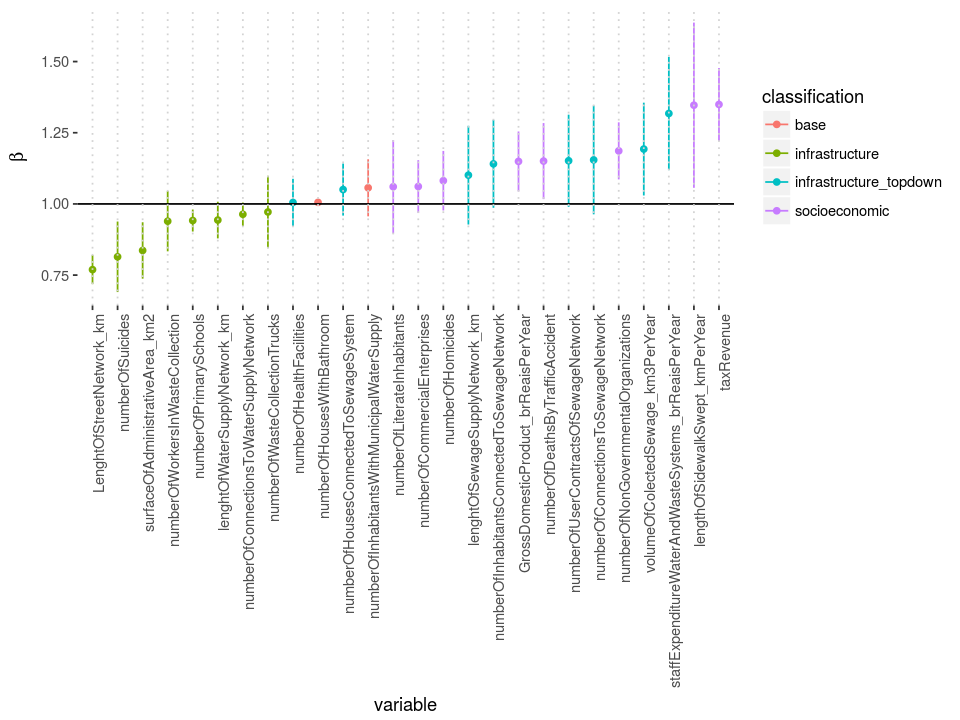

In [67]:
ggplot(scaling_poscorte_classification)+
  geom_point(aes(variable, alpha, colour=classification))+
  geom_segment(aes(x = variable, y = ci_lw, xend = variable, yend = ci_hi, colour=classification))+
  geom_hline(yintercept=1)+ ylab(expression(beta))+
  geom_vline(data = scaling_poscorte_classificacao, aes(xintercept = 1:nrow(scaling_poscorte_classificacao)), linetype="dotted", color = "lightgrey", size=0.5)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), panel.background = element_rect(fill = 'white', colour = 'white' ))

ggsave('./plots/variables_ci.jpg', width=8, height= 6) 

In [ ]:
########## TESE ###########

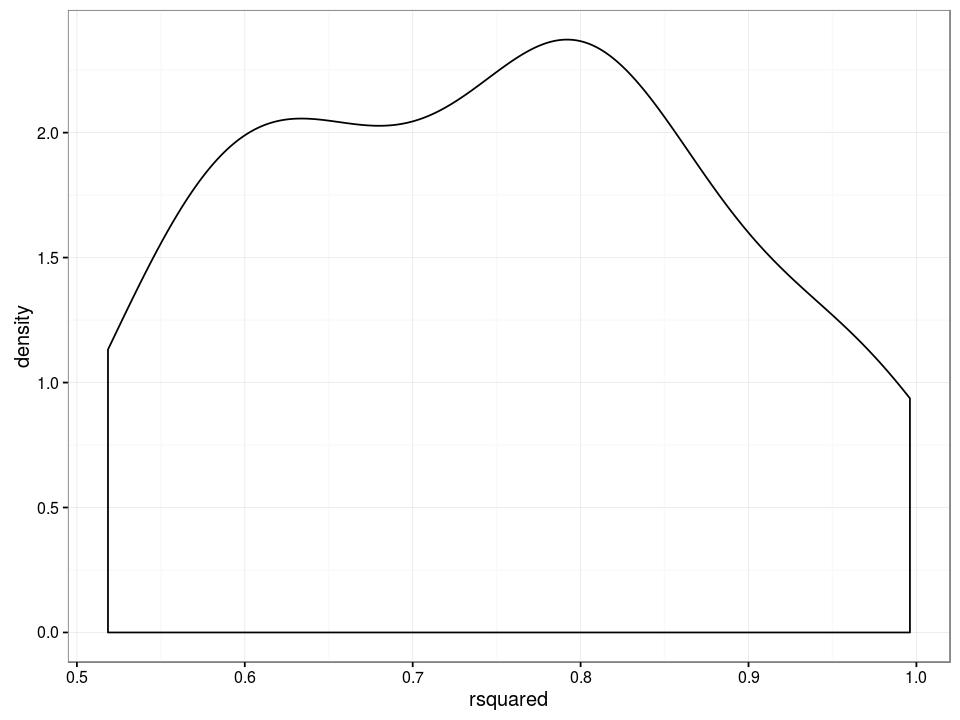

In [106]:
ggplot(scaling_poscorte_classificacao, aes(rsquared))+geom_density()+theme_bw()

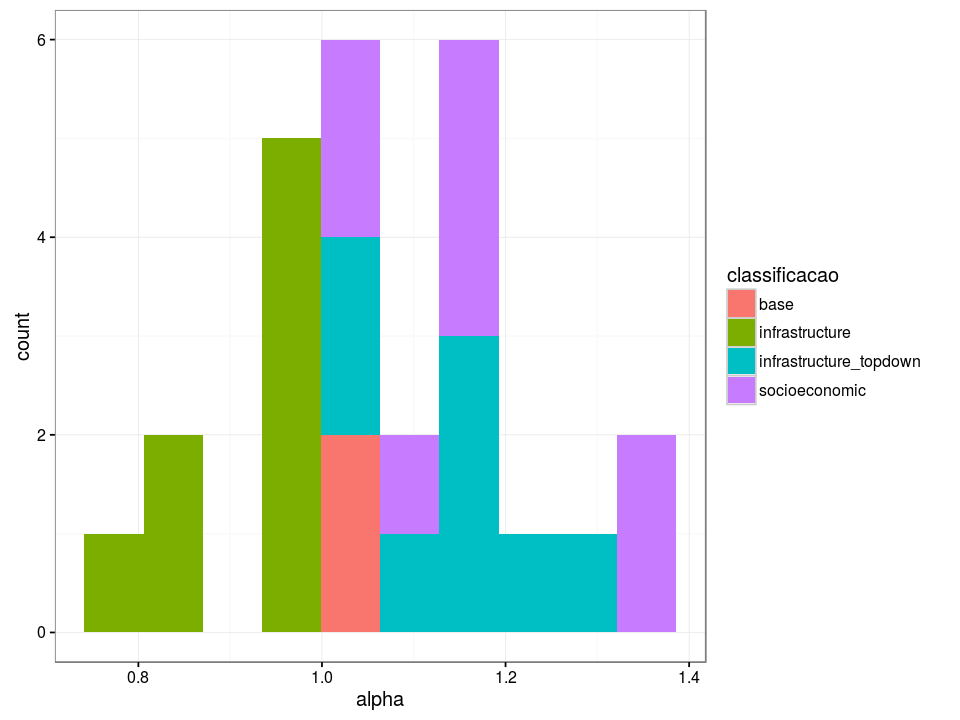

In [104]:
ggplot(scaling_poscorte_classificacao, aes(alpha, fill=classificacao))+geom_histogram(bins = 10)+
theme_bw()

# Residuals

In [184]:
#create data.frame without city names and state for the scaling analysis
basepars_residual_original <- base
basepars_residual_original <- subset(base_residual, populationDensity_inhabitantsPerkm2>1100)
basepars_residual_original <- basepars_residual_original[-c(2:3)]
ncol_original <- ncol(basepars_residual_original)



In [185]:
basepars_residual <- basepars_residual_original

In [186]:
for (v in 1:ncol(basepars_residual_original)){
    print(v)
   # print(v/ncol(basepars_residual))
  colname <- colnames(basepars_residual_original)[v]
    #print(colname)
    #print(colnames(basepars_residual)[v])

  #  new_colname <- paste(colname,"residual",sep="_")
   # nes_colnames <- c(nes_colnames, new_colname)
    
  
    lm <- lm(log10(basepars_residual_original[,v]+1) ~ log10(basepars_residual_original[,1]+1), na.action=na.exclude)
    basepars_residual <- cbind(basepars_residual, resid(lm))
    colnames(basepars_residual)[ncol_original+v] <- paste(colname,"residual",sep="_")

    
  }

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65


In [152]:
basepars_residual <- basepars_residual[,-66]

In [158]:
colnames(basepars_residual)

[1] "Codigo"                                                          
  [2] "pop"                                                             
  [3] "area"                                                            
  [4] "pib"                                                             
  [5] "km_ruas"                                                         
  [6] "densidade"                                                       
  [7] "estabelecimentos_saude_total"                                    
  [8] "leitosinternacao_saude_total"                                    
  [9] "escolas_fundamental"                                             
 [10] "escolas_medio"                                                   
 [11] "escolas_preescola"                                               
 [12] "ongs"                                                            
 [13] "emp_atuantes"                                                    
 [14] "emp_unidades_locais"                                             
 [15] "vítimas_acidentes_trânsito"                                      
 [16] "homicidios"                                                      
 [17] "suicidios"                                                       
 [18] "Despesa_corrente"                                                
 [19] "Despesa_de_custeio"                                              
 [20] "Despesa_de_capital"                                              
 [21] "Despesa_orcamentaria"                                            
 [22] "Despesas_por_funcao"                                             
 [23] "Despesa_transferências_correntes"                                
 [24] "Receita_orcamentaria"                                            
 [25] "Receita_corrente"                                                
 [26] "Receita_tributaria"                                              
 [27] "Receita_de_capital"                                              
 [28] "Receita_tributaria_impostos"                                     
 [29] "Receita_tributaria_IPTU"                                         
 [30] "Receita_tributaria_ISS"                                          
 [31] "Receita_tributaria_taxas"                                        
 [32] "pessoas_comregistro"                                             
 [33] "alfabetizados"                                                   
 [34] "renda"                                                           
 [35] "domicilio_tinha_banheiro"                                        
 [36] "domicilio_tinha_banheiro_redeesgoto"                             
 [37] "pessoa_abastecimento_redegeral"                                  
 [38] "pessoa_lixo_coletado"                                            
 [39] "pessoa_energia_eletrica"                                         
 [40] "pessoa_com_banheiroexclusivo"                                    
 [41] "pessoa_energia_eletrica_medidor"                                 
 [42] "pessoa_lixo_jogado_terrenobaldio"                                
 [43] "pessoa_lixo_queimado"                                            
 [44] "receitaOperacional_total_aguaesgoto_reaisporano"                 
 [45] "arrecadacao_total_aguaesgoto_reaisporano"                        
 [46] "despesa_comPessoal_total_aguaesgoto_reaisporano"                 
 [47] "pop_abastecimentoAgua"                                           
 [48] "ligacoes_totais_abastecimentoAgua"                               
 [49] "extencaoRede_abastecimentoAgua_km"                               
 [50] "consumoEnergia_abastecimentoAgua_milKWhporano"                   
 [51] "investimentos_abastecimentoAgua_reaisporano"                     
 [52] "paralizacoes_economiasAtivasAtingidas_abastecimentoAgua"         
 [53] "pop_esgotamentoSanitario"                                        
 [54] "ligacoes_totais_esgotamentoSanitario"                            
 [55] "economiasAtivas_esgotamentoSanitario"                

In [154]:
str(basepars_residual)

'data.frame':	88 obs. of  129 variables:
 $ Codigo                                                          : int  150080 150140 211130 230440 230765 240325 240810 250180 250320 250750 ...
 $ pop                                                             : int  471980 1393399 1014837 2452185 209057 202456 803739 99716 57944 723515 ...
 $ area                                                            : num  190 1059 835 315 111 ...
 $ pib                                                             : num  1637438 8025927 7993678 16556801 1829566 ...
 $ km_ruas                                                         : num  8.02 16.57 16.93 42.83 3.7 ...
 $ densidade                                                       : num  2478 1315 1216 7787 1878 ...
 $ estabelecimentos_saude_total                                    : int  84 380 283 531 45 70 423 38 37 446 ...
 $ leitosinternacao_saude_total                                    : int  757 3686 3430 6704 218 166 2834 35 56 2987 ...
 $

In [198]:
write.csv(basepars_residual, "basepars_residual.csv")


In [ ]:
## viz residuals

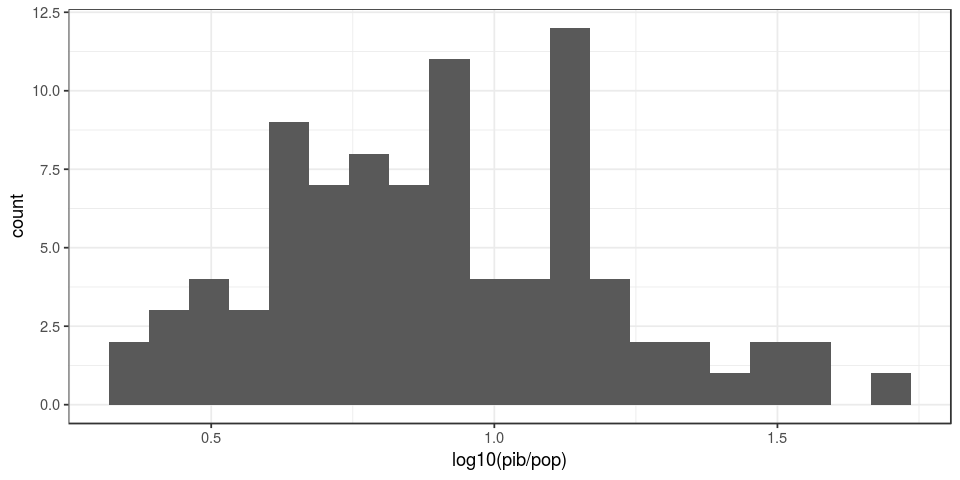

In [203]:
ggplot(basepars_residual, aes(log10(pib/pop)))+geom_histogram(bins=20)+theme_bw()

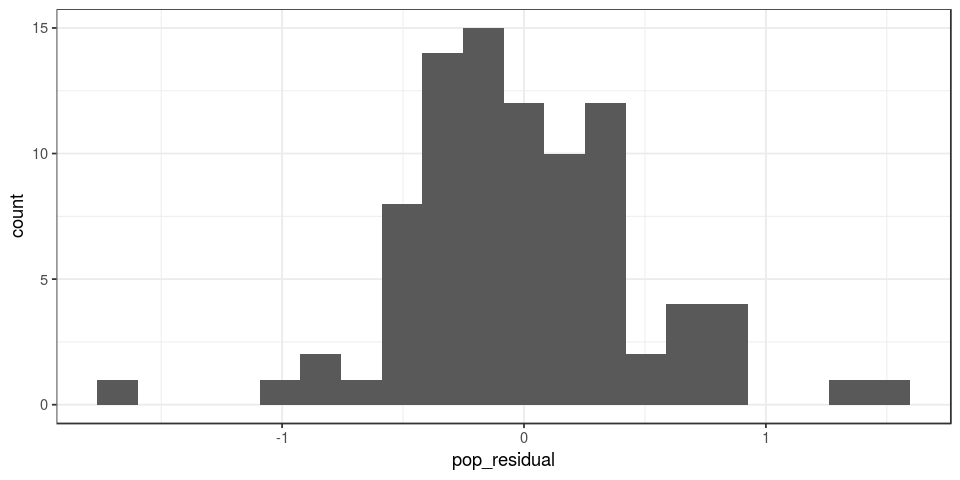

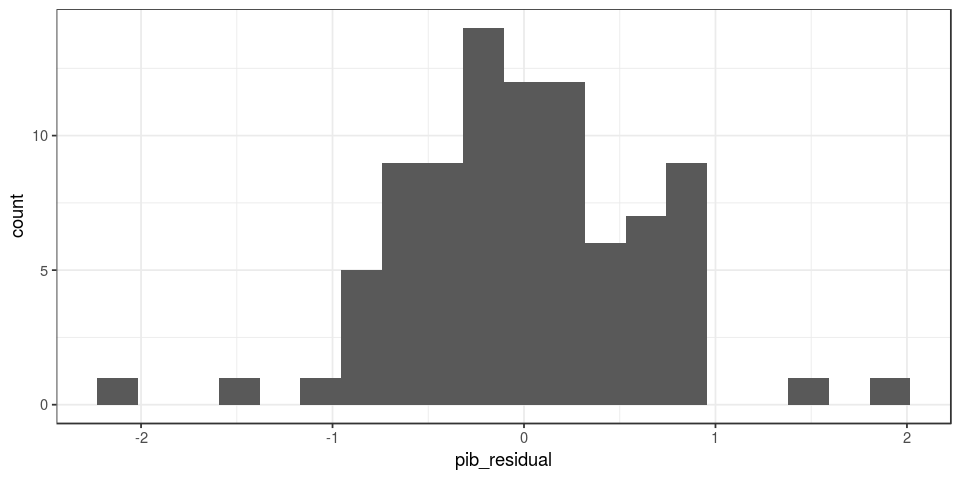

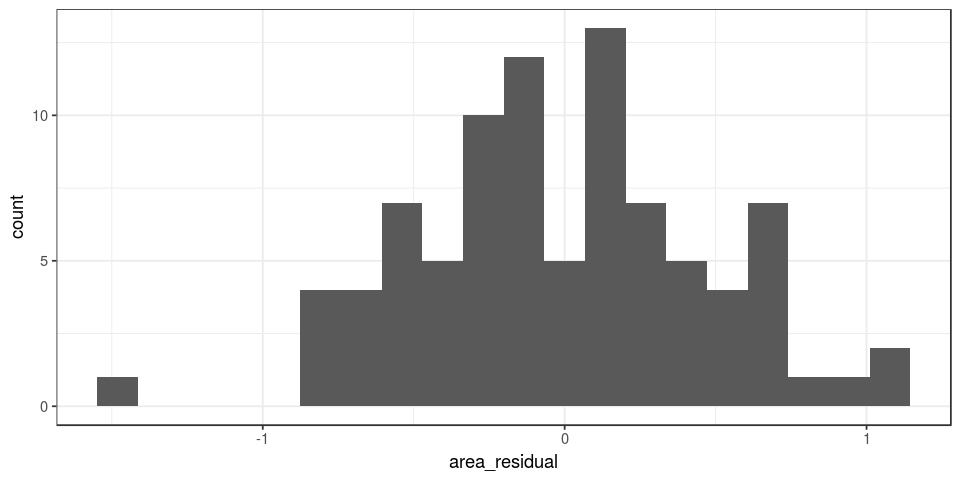

In [192]:
ggplot(basepars_residual, aes(pop_residual))+geom_histogram(bins=20)+theme_bw()
ggplot(basepars_residual, aes(pib_residual))+geom_histogram(bins=20)+theme_bw()
ggplot(basepars_residual, aes(area_residual))+geom_histogram(bins=20)+theme_bw()

`geom_smooth()` using method = 'loess'


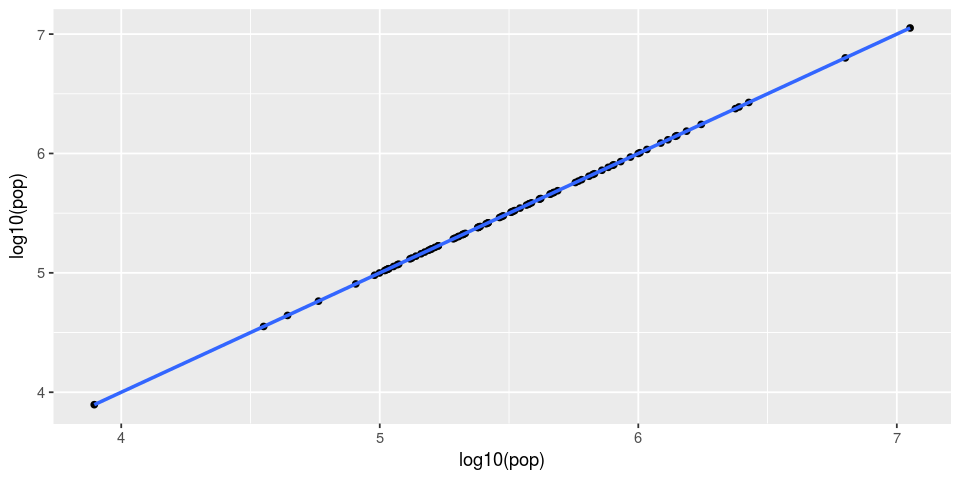

In [196]:
ggplot(basepars_residual, aes(log10(pop), log10(pop)))+geom_point()+geom_smooth()

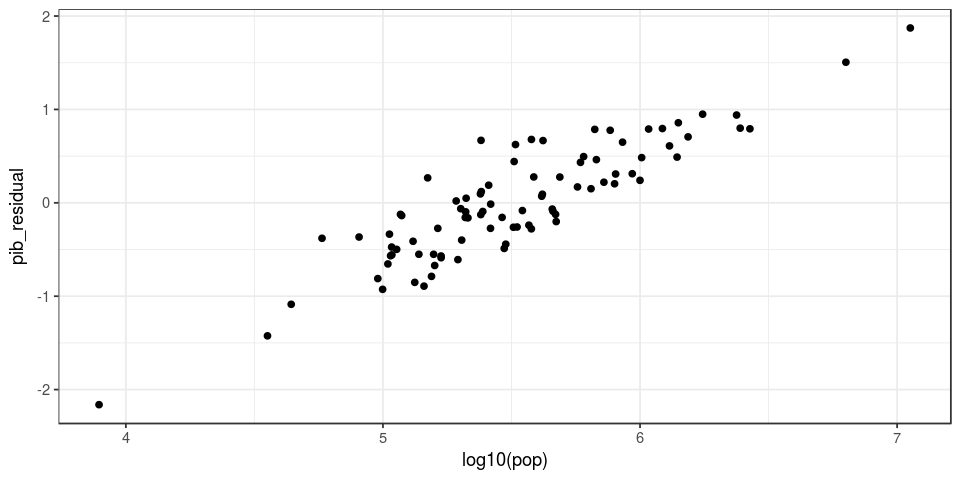

In [194]:
ggplot(basepars_residual, aes(log10(pop), pib_residual))+geom_point()+
theme_bw()

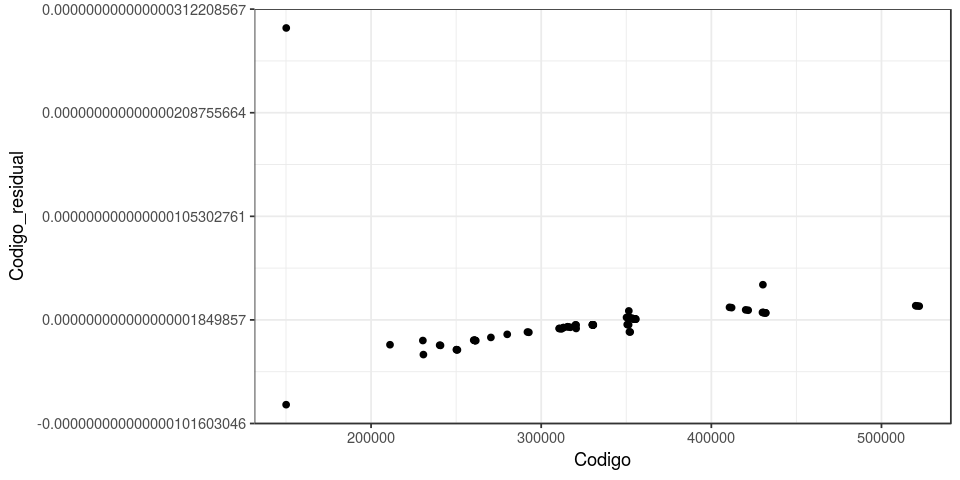

In [200]:
ggplot(basepars_residual, aes(Codigo, Codigo_residual))+geom_point()+
theme_bw()

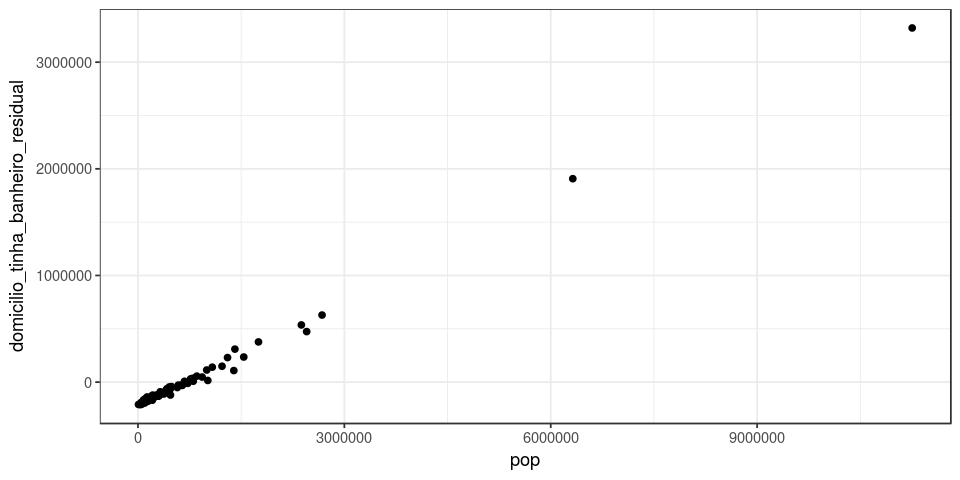

In [182]:
ggplot(basepars_residual, aes(pop, domicilio_tinha_banheiro_residual))+geom_point()+
theme_bw()

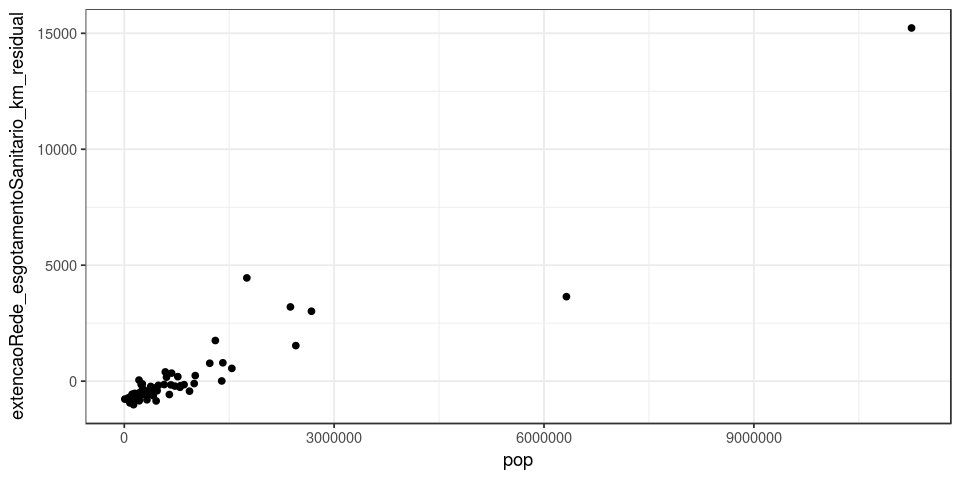

In [183]:
ggplot(basepars_residual, aes(pop, extencaoRede_esgotamentoSanitario_km_residual))+geom_point()+
theme_bw()